In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [3]:
path = "results/"

In [4]:
def get_n_of_selectors(data, target):
    n_of_selectors = 0
    rv = {}
    target_found = False
    for i in range(len(data.columns)):
        column = data.columns[i]
        if column != target:
            n_of_selectors += data[column].nunique()
            rv[i] = n_of_selectors
        else:
            target_found = True
            rv[i] = n_of_selectors
    if not target_found:
        print("Warning:Target not found in data")
    return rv

mimic = pd.read_csv("../../data/mimic-iii.csv")
ab = pd.read_csv("../../data/mimic-iii-preprocessed-db-sample-400.csv")
mushrooms = pd.read_csv("../../data/agaricus-lepiota.data")

mimic_selectors = get_n_of_selectors(mimic, "interpretation")
ab_selectors = get_n_of_selectors(ab, "culture_susceptibility")
mushrooms_selectors = get_n_of_selectors(mushrooms, "p")

get_selectors = {
    "MIMIC": mimic_selectors,
    "AB": ab_selectors,
    "Mushrooms": mushrooms_selectors
}


In [5]:
get_selectors

{'MIMIC': {0: 21,
  1: 60,
  2: 60,
  3: 62,
  4: 66,
  5: 70,
  6: 76,
  7: 80,
  8: 82,
  9: 98,
  10: 105,
  11: 108,
  12: 112,
  13: 117},
 'AB': {0: 0, 1: 2, 2: 4, 3: 6, 4: 10, 5: 17, 6: 22, 7: 24, 8: 31, 9: 37},
 'Mushrooms': {0: 0,
  1: 6,
  2: 10,
  3: 20,
  4: 22,
  5: 31,
  6: 33,
  7: 35,
  8: 37,
  9: 49,
  10: 51,
  11: 56,
  12: 60,
  13: 64,
  14: 73,
  15: 82,
  16: 83,
  17: 87,
  18: 90,
  19: 95,
  20: 104,
  21: 110,
  22: 117}}

In [6]:
df = pd.DataFrame(columns=["Time (s)", "Memory (bytes)", "Algorithm", "Dataset", "Selectors", "Columns"])
for file_name in os.listdir(path):
    file = open(path + file_name, "r")
    file_name = file_name.split(".")[0]
    file_params = file_name.split("_")
    if len(file_params) <= 3:
        file.close()
        continue
    alg = file_params[1]
    dataset = file_params[2]
    columns = int(file_params[3])
    file.readline()
    time, memory = eval(file.readline())
    file.close()
    try:
        selectors = get_selectors[dataset][columns]
    except KeyError:
        print("Error: Dataset or columns not found", dataset, columns)
    df.loc[len(df)] = [time, memory, alg, dataset, selectors, columns]


In [7]:
df.head(20)

,Time (s),Memory (bytes),Algorithm,Dataset,Selectors,Columns
0,11.223102,179597312,SDMapStar,Mushrooms,64,13
1,17.040960,189353984,QFinder,AB,24,7
2,6.338180,189448192,BSD,MIMIC,82,8
3,13.205933,175882240,BSD,Mushrooms,87,17
4,9.193198,197537792,IDSD,MIMIC,117,13
5,7121.632352,2427912192,QFinder,Mushrooms,60,12
6,213.143273,226172928,SDMapStar,MIMIC,117,13
7,5.234430,175710208,BSD,Mushrooms,73,14
8,0.323627,171397120,IDSD,AB,22,6
9,1828.323692,1102966784,QFinder,Mushrooms,51,10


In [8]:
## Save figures
base_path = ""
save_flag = False


In [9]:
label_order = ["IDSD", "QFinder", "SDMapStar", "BSD"]
palette = {
    "IDSD": "blue",
    "QFinder": "red",
    "SDMapStar": "green",
    "BSD": "orange"
}

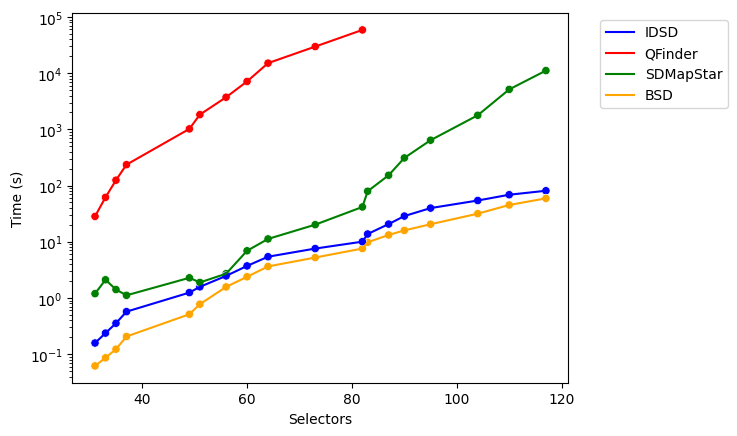

In [10]:
sns.lineplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Execution time for Mushroom dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/time_mush.png", bbox_inches='tight')

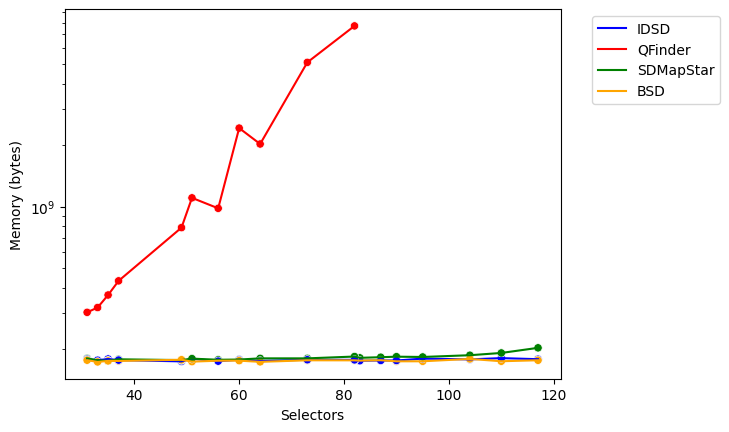

In [11]:
sns.lineplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "Mushrooms"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for Mushroom dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_mush.png", bbox_inches='tight')

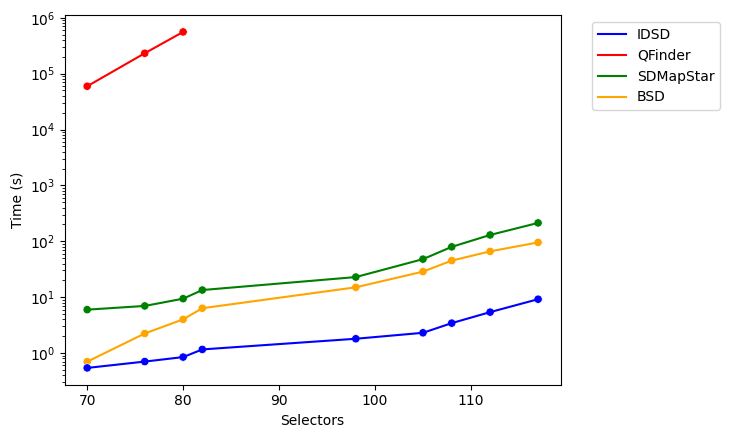

In [12]:
sns.lineplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Execution time for Staph Aur Coag+ \n dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/time_mimic.png", bbox_inches='tight')

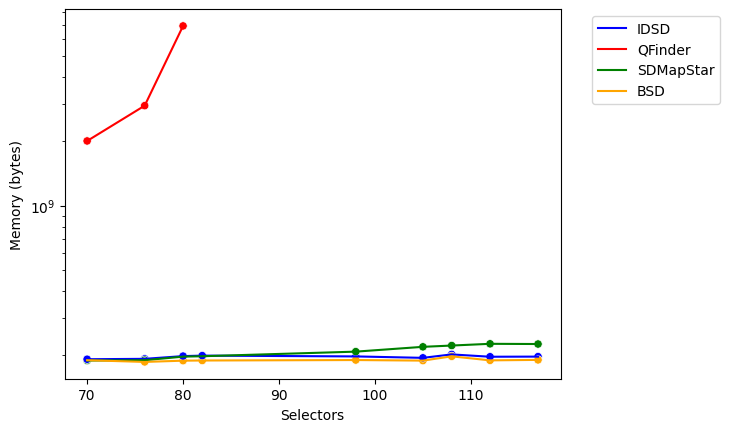

In [13]:
sns.lineplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "MIMIC"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for Staph Aur Coag+ \n dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_mimic.png", bbox_inches='tight')

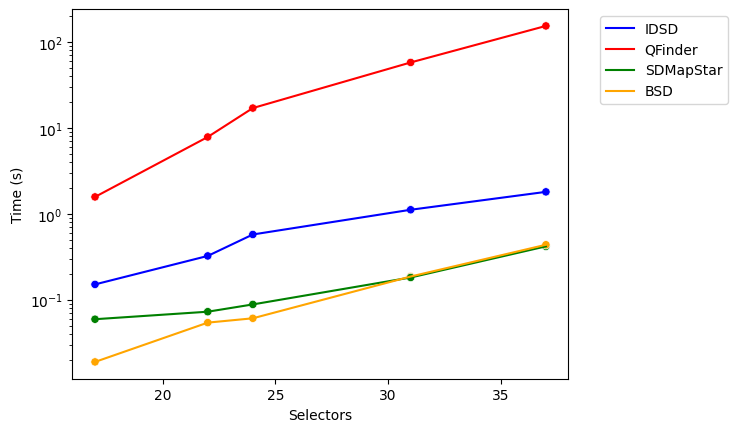

In [14]:
sns.lineplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
#Force x ticks to be integers
plt.xticks(np.arange(20, 40, 5))
# plt.title("Execution time for Vancomycin dataset (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/time_ab.png", bbox_inches='tight')

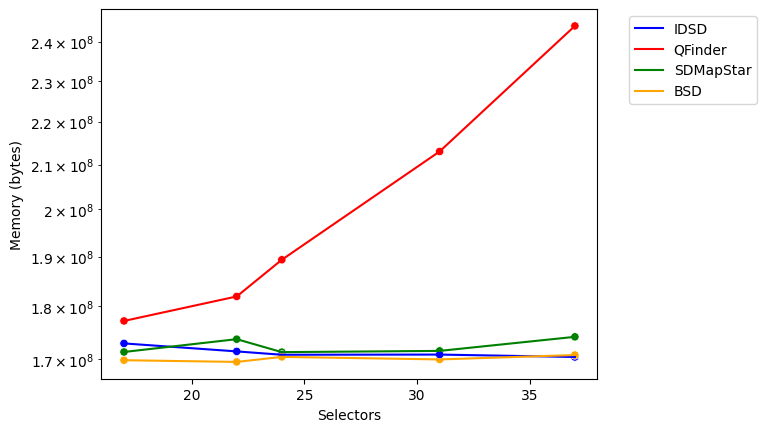

In [15]:
sns.lineplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order)
sns.scatterplot(data=df[df["Dataset"] == "AB"], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette)
plt.yscale("log")
# plt.title("Maximum memory usage for\nVancomycin dataset (log scale)")
plt.xticks(np.arange(20, 40, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
if save_flag:
    plt.savefig(f"{base_path}/memory_ab.png", bbox_inches='tight')

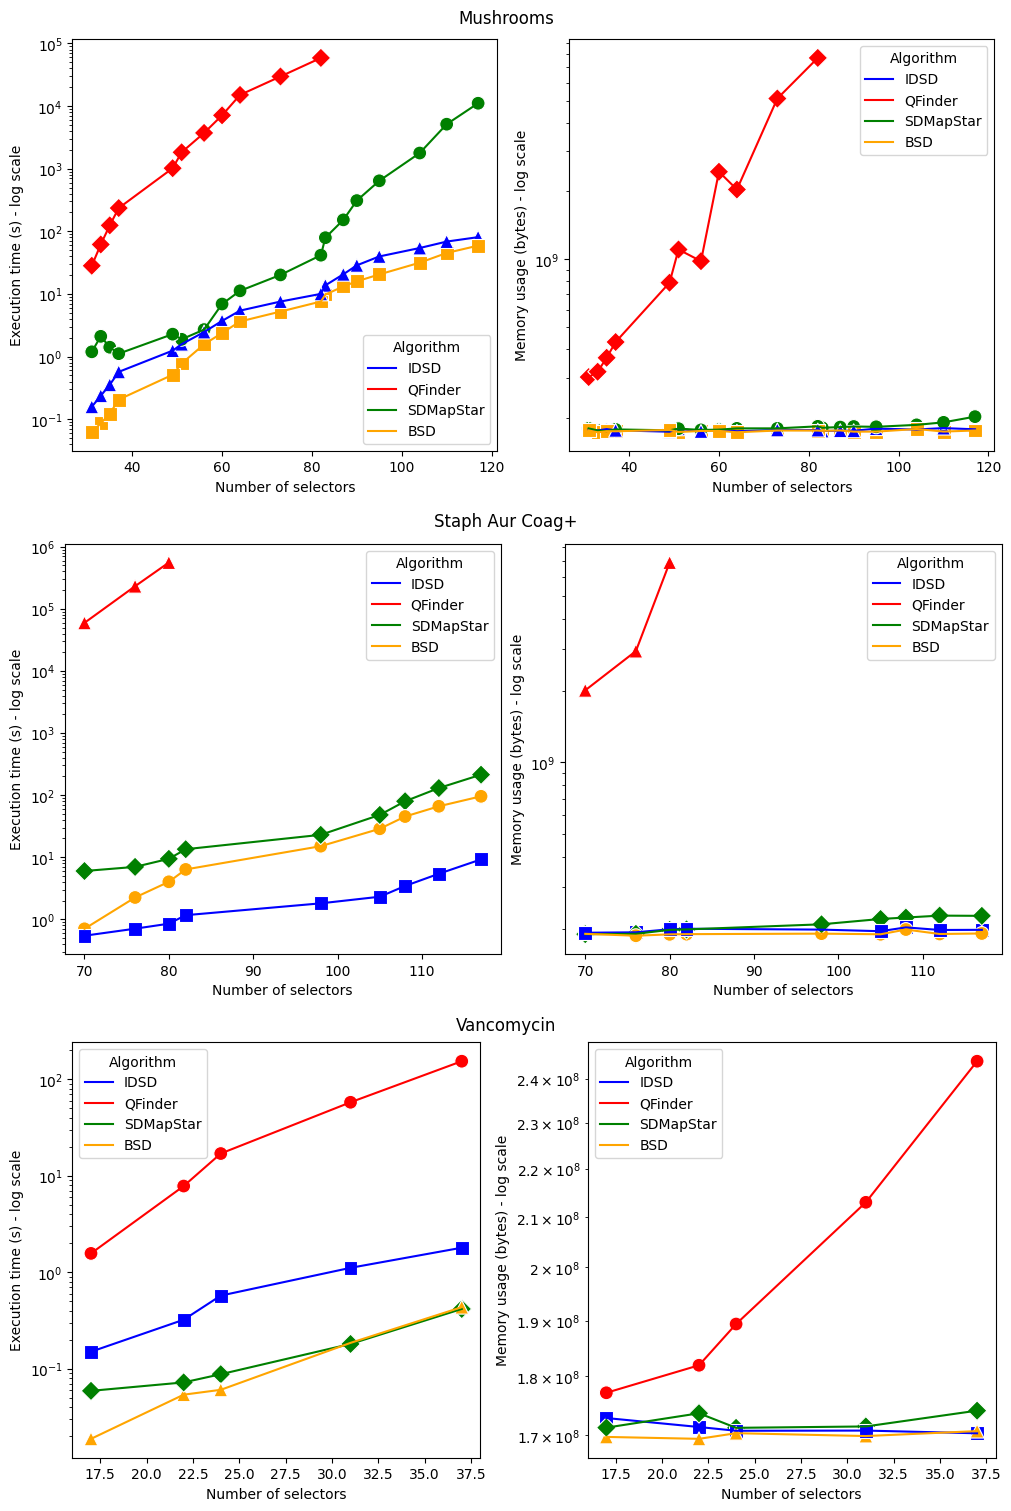

In [16]:
datasets = ["Mushrooms","MIMIC", "AB" ]
algorithms = ["IDSD", "QFinder", "SDMapStar", "BSD"]

fig = plt.figure(constrained_layout=True, figsize=(10, 15))
subfigs = fig.subfigures(nrows=3, ncols=1)

for row, subfig in enumerate(subfigs):
    subfig.suptitle(datasets[row])
    if datasets[row] == "MIMIC":
        subfig.suptitle("Staph Aur Coag+")
    elif datasets[row] == "AB":
        subfig.suptitle("Vancomycin")
    axs = subfig.subplots(1, 2)
    sns.lineplot(data=df[df["Dataset"] == datasets[row]], x="Selectors", y="Time (s)", hue="Algorithm", palette=palette, hue_order=label_order, ax=axs[0])
    sns.scatterplot(data=df[df["Dataset"] == datasets[row]], x="Selectors", y="Time (s)", hue="Algorithm", legend=False, palette=palette, ax=axs[0], style="Algorithm", markers=["o", "s", "D", "^"], s=100)
    axs[0].set_yscale("log")
    axs[0].set_ylabel("Execution time (s) - log scale")
    axs[0].set_xlabel("Number of selectors")
    sns.lineplot(data=df[df["Dataset"] == datasets[row]], x="Selectors", y="Memory (bytes)", hue="Algorithm", palette=palette, hue_order=label_order, ax=axs[1])
    sns.scatterplot(data=df[df["Dataset"] == datasets[row]], x="Selectors", y="Memory (bytes)", hue="Algorithm", legend=False, palette=palette, ax=axs[1], style="Algorithm", markers=["o", "s", "D", "^"], s=100)
    axs[1].set_yscale("log")
    axs[1].set_xlabel("Number of selectors")
    axs[1].set_ylabel("Memory usage (bytes) - log scale")

if save_flag:
    plt.savefig(f"{base_path}/all_datasets.png", bbox_inches='tight')
